In [1]:
!pip install pandas

In [2]:
import pandas as pd

# Path to the training dataset (adjust the file path)
file_path = '/content/test_FD001.txt'  # Example: Replace with the actual file path

# Load the data using space as the separator
data = pd.read_csv(file_path, sep=' ', header=None)

# Print the first few rows of the data
print(data.head())


   0   1       2       3      4       5       6        7        8      9   \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735 NaN NaN  
1  ...  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916 NaN NaN  
2  ...  8130.10  8.4441  0.03  393  2388  100.0  39.08  23.4166 NaN NaN  
3  ...  8132.90  8.3917  0.03  391  2388  100.0  39.00  23.3737 NaN NaN  
4  ...  8129.54  8.4031  0.03  390  2388  100.0  38.99  23.4130 NaN NaN  

[5 rows x 28 columns]


In [3]:
# Column names as per dataset description
columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
           'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
           'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10',
           'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15',
           'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
           'sensor_measurement_21','sensor_measurement_22','sensor_measurement_23']

# Assign the column names to the dataset
data.columns = columns

# Print the first few rows to check if the data looks correct
print(data.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67                643.02   
1                  100.0                518.67                641.71   
2                  100.0                518.67                642.46   
3                  100.0                518.67                642.44   
4                  100.0                518.67                642.51   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

In [4]:
# Remove extra spaces from column names (if any)
data.columns = data.columns.str.strip()

# Fill or drop missing values (if applicable)
data = data.fillna(0)  # Or use .dropna() depending on your needs


In [5]:
print(data.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67                643.02   
1                  100.0                518.67                641.71   
2                  100.0                518.67                642.46   
3                  100.0                518.67                642.44   
4                  100.0                518.67                642.51   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the sensor measurements
scaler = StandardScaler()
sensor_columns = [col for col in data.columns if 'sensor_measurement' in col]
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])


In [7]:
print(data.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                   0.0              1.359276   
1                  100.0                   0.0             -1.908502   
2                  100.0                   0.0             -0.037636   
3                  100.0                   0.0             -0.087526   
4                  100.0                   0.0              0.087088   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

In [8]:
# Calculate RUL based on the maximum cycle for each unit
max_cycles = data.groupby('unit_number')['time_in_cycles'].max()
data['RUL'] = data.apply(lambda row: max_cycles[row['unit_number']] - row['time_in_cycles'], axis=1)



In [9]:
print(data.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                   0.0              1.359276   
1                  100.0                   0.0             -1.908502   
2                  100.0                   0.0             -0.037636   
3                  100.0                   0.0             -0.087526   
4                  100.0                   0.0              0.087088   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

**Exploratory Data Analysis (EDA)**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

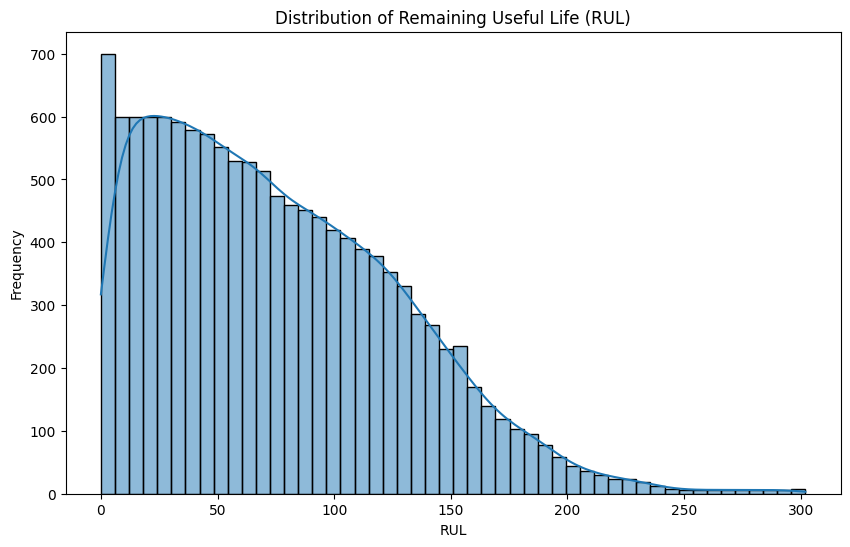

In [11]:
# Plot RUL distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['RUL'], bins=50, kde=True)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

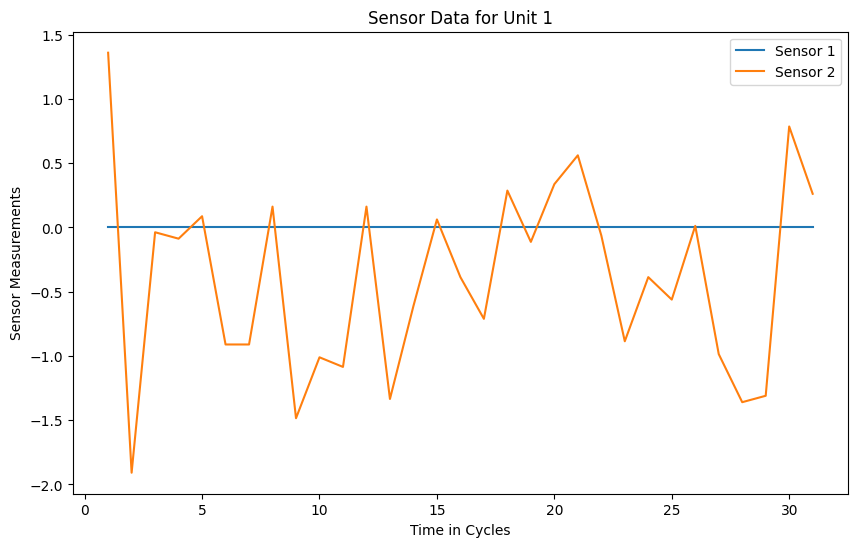

In [12]:
# Plot time-series data for one unit
unit_data = data[data['unit_number'] == 1]  # Replace 1 with any unit number
plt.figure(figsize=(10, 6))
plt.plot(unit_data['time_in_cycles'], unit_data['sensor_measurement_1'], label='Sensor 1')
plt.plot(unit_data['time_in_cycles'], unit_data['sensor_measurement_2'], label='Sensor 2')
plt.title(f'Sensor Data for Unit 1')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Measurements')
plt.legend()
plt.show()

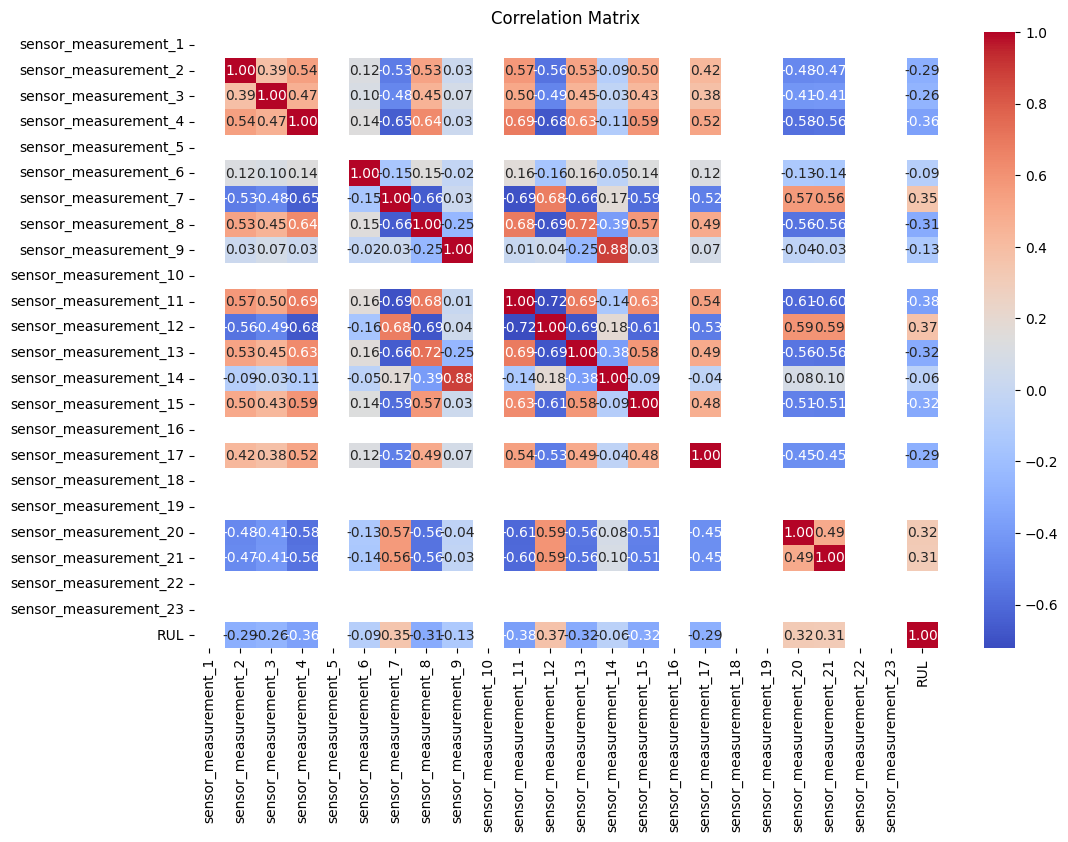

In [13]:
# Check correlations between RUL and sensor measurements
correlation_matrix = data[sensor_columns + ['RUL']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Feature Engineering**

In [14]:
# Add rolling mean features
for sensor in sensor_columns:
    data[sensor + '_rolling_mean'] = data.groupby('unit_number')[sensor].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)


**Splitting the Data into Train and Test Sets**

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (grouping by unit_number)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['unit_number'])


**Model Selection (Regression )**

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [17]:
# Selecting features for training (excluding unit_number, time_in_cycles, RUL)
features = [col for col in data.columns if col not in ['unit_number', 'time_in_cycles', 'RUL']]


In [18]:
X_train = train_data[features]
y_train = train_data['RUL']
X_test = test_data[features]
y_test = test_data['RUL']

In [19]:
# Model training
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [20]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [21]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 32.421946564885495


**Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [23]:
# Define a binary classification target based on RUL threshold (e.g., failure if RUL < 30)
threshold = 30
train_data['failure'] = (train_data['RUL'] < threshold).astype(int)
test_data['failure'] = (test_data['RUL'] < threshold).astype(int)

In [24]:
# Features and target for classification
X_train = train_data[features]
y_train = train_data['failure']
X_test = test_data[features]
y_test = test_data['failure']

In [25]:
# Model training
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [26]:
# Predict on test set
y_pred = rf_clf.predict(X_test)

In [27]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2043
           1       0.83      0.31      0.45       577

    accuracy                           0.83      2620
   macro avg       0.83      0.65      0.68      2620
weighted avg       0.83      0.83      0.80      2620



**Calculate Feature Importance**

In [28]:
# For the classifier
import matplotlib.pyplot as plt
import numpy as np

In [29]:

# Get feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [30]:
# Assuming you have a list of feature names, for example, if your data has columns like 'sensor_1', 'sensor_2', ...
sensor_columns = X_train.columns.tolist()  # or manually define it based on your data structure

# Check that the length of sensor_columns matches the number of features
assert len(sensor_columns) == len(importances), "Feature column count doesn't match the importance array length"

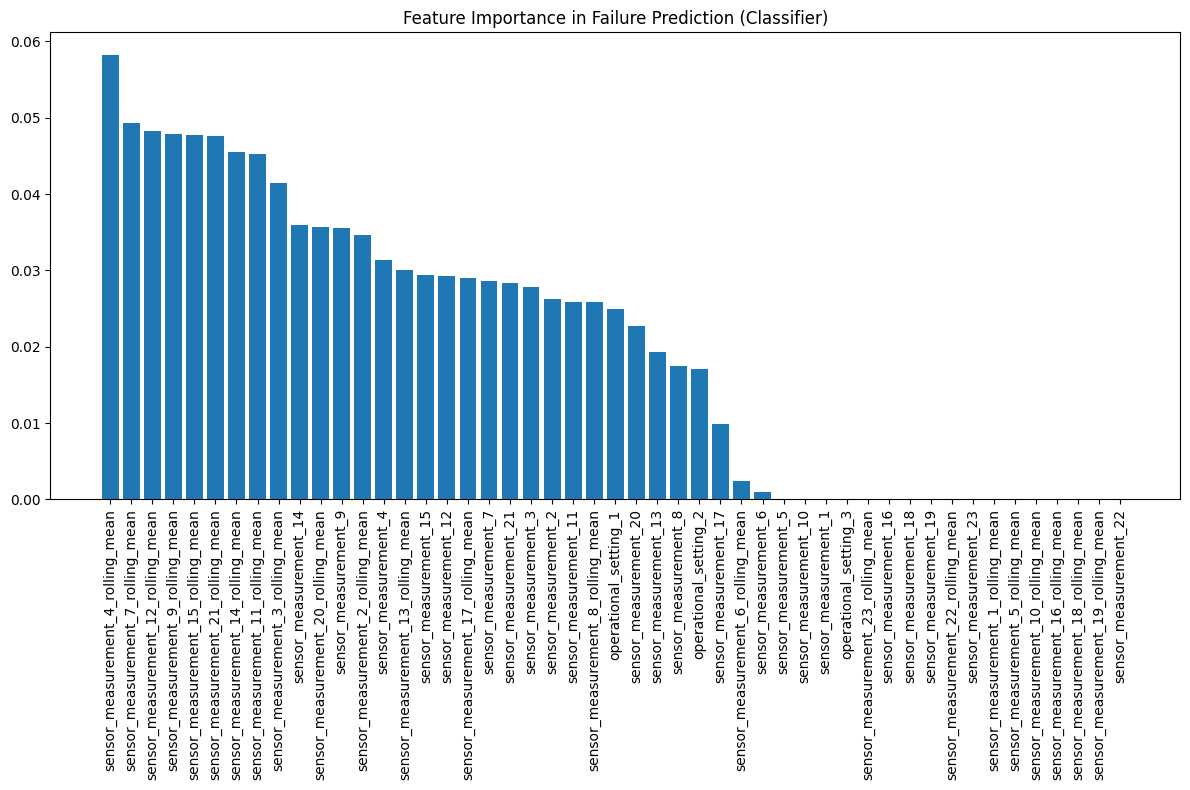

In [31]:
# Plot feature importance

plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Failure Prediction (Classifier)")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [sensor_columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10476, 49)
y_train shape: (10476,)
X_test shape: (2620, 49)
y_test shape: (2620,)


**Hyperparameter Tuning with GridSearchCV**

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [35]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [36]:
# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.8277009965566873


**Re-train the Classifier with Optimal Hyperparameters**

In [37]:
# Retraining the classifier with the best parameters
best_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model to the training data
best_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_best = best_classifier.predict(X_test)

In [38]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2043
           1       0.84      0.31      0.45       577

    accuracy                           0.83      2620
   macro avg       0.84      0.64      0.67      2620
weighted avg       0.83      0.83      0.80      2620



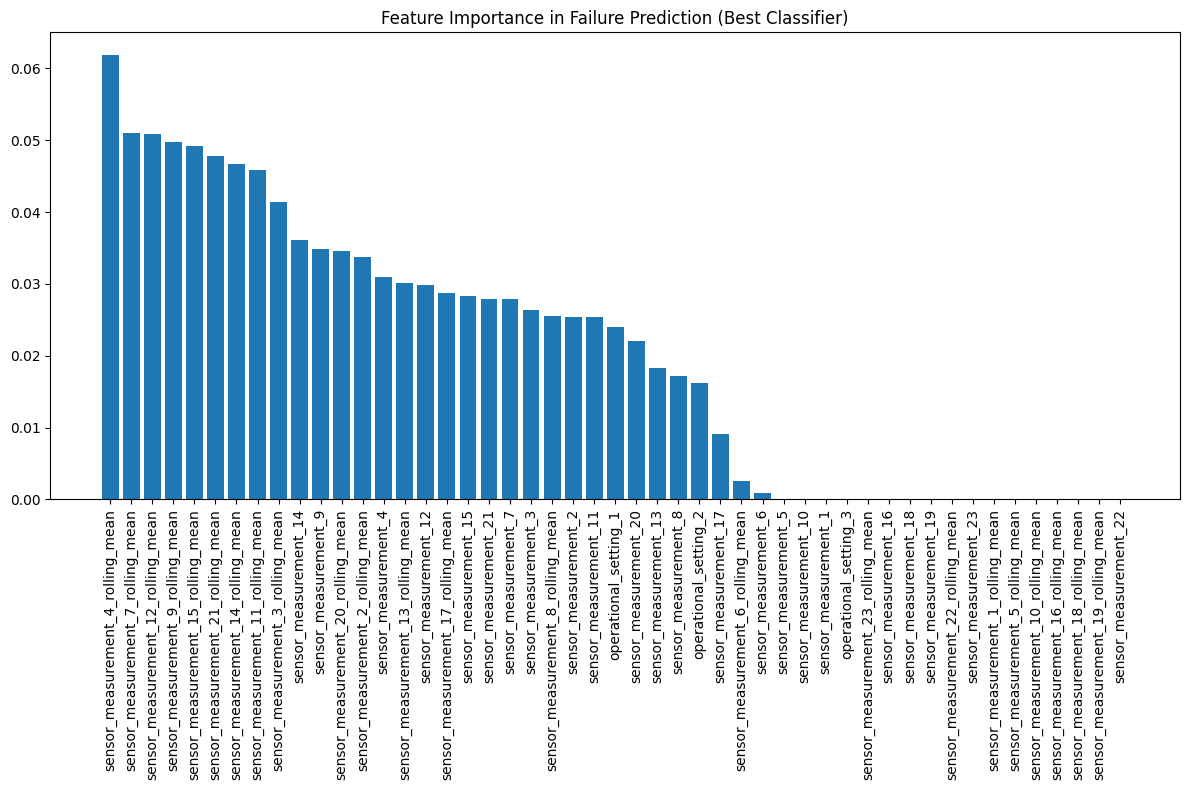

In [39]:
# Feature importance for the best model
importances = best_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Failure Prediction (Best Classifier)")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [sensor_columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


**Evaluate the Regression Model**

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions and evaluation
y_pred= rf_model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 76.17491603053435
Mean Squared Error (MSE): 6596.329017595421
R² Score: -38410.45095217299


In [41]:
# Assuming `failure_predictions` and `rul_predictions` are arrays of predictions from the models
data['Failure_Prediction'] = rf_clf.predict(data[sensor_columns])
data['Predicted_RUL'] = rf_model.predict(data[sensor_columns])


In [42]:
data.to_csv('/content/predictive_maintenance_data.csv', index=False)
